In [11]:
import pandas as pd # Pour le dataframe
import numpy as np # Pour la normalisation et calculs de moyenne
import matplotlib.pyplot as plt # Pour la visualisation

from PIL import Image

import librosa # Pour l'extraction des features et la lecture des fichiers wav
import librosa.display # Pour récupérer les spectrogrammes des audio
import librosa.feature

import os # C'est ce qui va nous permettre d'itérer sur les fichiers de l'environnement de travail

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, RandomizedSearchCV # Split de dataset et optimisation des hyperparamètres
from sklearn.ensemble import RandomForestClassifier # Random forest
from sklearn.ensemble import GradientBoostingClassifier # XGBoost
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.svm import SVC # SVM
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, zero_one_loss, classification_report # Métriques pour la mesure de performances
from sklearn.preprocessing import normalize, StandardScaler

import tensorflow as tf # Pour le reseau de neurones simple et pour le CNN

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model


from xgboost import XGBClassifier
from pprint import pprint

import joblib
import random

In [17]:
# Définissons la liste avec les genres :

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock'] 

# Création d'un dictionnaire avec les genres vide :

audio_files = {}


for genre in genres:
  audio_files[genre] = []

# Remplissage du dictionnaire en important les fichiers audio avec Librosa :

for genre in genres:
  print(os.listdir(f'./genres_original/{genre}'))
  for audio in os.listdir(f'./genres_original/{genre}'):
    
    audio_files[genre].append(librosa.load(f'./genres_original/{genre}/{audio}')[0])

['blues.00000.wav', 'blues.00001.wav', 'blues.00002.wav', 'blues.00003.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00006.wav', 'blues.00007.wav', 'blues.00008.wav', 'blues.00009.wav', 'blues.00010.wav', 'blues.00011.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00014.wav', 'blues.00015.wav', 'blues.00016.wav', 'blues.00017.wav', 'blues.00018.wav', 'blues.00019.wav', 'blues.00020.wav', 'blues.00021.wav', 'blues.00022.wav', 'blues.00023.wav', 'blues.00024.wav', 'blues.00025.wav', 'blues.00026.wav', 'blues.00027.wav', 'blues.00028.wav', 'blues.00029.wav', 'blues.00030.wav', 'blues.00031.wav', 'blues.00032.wav', 'blues.00033.wav', 'blues.00034.wav', 'blues.00035.wav', 'blues.00036.wav', 'blues.00037.wav', 'blues.00038.wav', 'blues.00039.wav', 'blues.00040.wav', 'blues.00041.wav', 'blues.00042.wav', 'blues.00043.wav', 'blues.00044.wav', 'blues.00045.wav', 'blues.00046.wav', 'blues.00047.wav', 'blues.00048.wav', 'blues.00049.wav', 'blues.00050.wav', 'blues.00051.wav', 'blues.0005

['hiphop.00000.wav', 'hiphop.00001.wav', 'hiphop.00002.wav', 'hiphop.00003.wav', 'hiphop.00004.wav', 'hiphop.00005.wav', 'hiphop.00006.wav', 'hiphop.00007.wav', 'hiphop.00008.wav', 'hiphop.00009.wav', 'hiphop.00010.wav', 'hiphop.00011.wav', 'hiphop.00012.wav', 'hiphop.00013.wav', 'hiphop.00014.wav', 'hiphop.00015.wav', 'hiphop.00016.wav', 'hiphop.00017.wav', 'hiphop.00018.wav', 'hiphop.00019.wav', 'hiphop.00020.wav', 'hiphop.00021.wav', 'hiphop.00022.wav', 'hiphop.00023.wav', 'hiphop.00024.wav', 'hiphop.00025.wav', 'hiphop.00026.wav', 'hiphop.00027.wav', 'hiphop.00028.wav', 'hiphop.00029.wav', 'hiphop.00030.wav', 'hiphop.00031.wav', 'hiphop.00032.wav', 'hiphop.00033.wav', 'hiphop.00034.wav', 'hiphop.00035.wav', 'hiphop.00036.wav', 'hiphop.00037.wav', 'hiphop.00038.wav', 'hiphop.00039.wav', 'hiphop.00040.wav', 'hiphop.00041.wav', 'hiphop.00042.wav', 'hiphop.00043.wav', 'hiphop.00044.wav', 'hiphop.00045.wav', 'hiphop.00046.wav', 'hiphop.00047.wav', 'hiphop.00048.wav', 'hiphop.00049.wav',

['rock.00000.wav', 'rock.00001.wav', 'rock.00002.wav', 'rock.00003.wav', 'rock.00004.wav', 'rock.00005.wav', 'rock.00006.wav', 'rock.00007.wav', 'rock.00008.wav', 'rock.00009.wav', 'rock.00010.wav', 'rock.00011.wav', 'rock.00012.wav', 'rock.00013.wav', 'rock.00014.wav', 'rock.00015.wav', 'rock.00016.wav', 'rock.00017.wav', 'rock.00018.wav', 'rock.00019.wav', 'rock.00020.wav', 'rock.00021.wav', 'rock.00022.wav', 'rock.00023.wav', 'rock.00024.wav', 'rock.00025.wav', 'rock.00026.wav', 'rock.00027.wav', 'rock.00028.wav', 'rock.00029.wav', 'rock.00030.wav', 'rock.00031.wav', 'rock.00032.wav', 'rock.00033.wav', 'rock.00034.wav', 'rock.00035.wav', 'rock.00036.wav', 'rock.00037.wav', 'rock.00038.wav', 'rock.00039.wav', 'rock.00040.wav', 'rock.00041.wav', 'rock.00042.wav', 'rock.00043.wav', 'rock.00044.wav', 'rock.00045.wav', 'rock.00046.wav', 'rock.00047.wav', 'rock.00048.wav', 'rock.00049.wav', 'rock.00050.wav', 'rock.00051.wav', 'rock.00052.wav', 'rock.00053.wav', 'rock.00054.wav', 'rock.000

In [12]:
def audio_pipeline(audio):


  features = []

  # Calcul du ZCR

  zcr = librosa.zero_crossings(audio)
  features.append(sum(zcr))

  # Calcul de la moyenne du Spectral centroid

  spectral_centroids = librosa.feature.spectral_centroid(y=audio)[0]
  features.append(np.mean(spectral_centroids))
  
  # Calcul du spectral rolloff point

  rolloff = librosa.feature.spectral_rolloff(y=audio)
  features.append(np.mean(rolloff))

  # Calcul des moyennes des MFCC

  mfcc = librosa.feature.mfcc(y=audio)

  for x in mfcc:
    features.append(np.mean(x))


  return features

In [13]:
column_names = ['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']

In [14]:
df = pd.DataFrame(columns = column_names)

In [15]:
i = 0
for g in genres:
  for music in audio_files[g]:
    df.loc[i] = audio_pipeline(music)+[g]
    i+=1

In [16]:
df.shape

(999, 24)

In [17]:
df.to_csv('musique.csv', index = False)

In [13]:
df = pd.read_csv("musique.csv")
df

,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,55032,1784.122641,3805.723030,-113.598820,121.570670,-19.162262,42.363940,-6.362266,18.621931,-13.699734,...,8.802088,-3.669941,5.744676,-5.162783,0.751706,-1.687854,-0.408730,-2.302677,1.222467,blues
1,37140,1530.261767,3550.713616,-207.523830,123.985140,8.947019,35.867150,2.909594,21.519472,-8.556513,...,5.377876,-2.234492,4.220704,-6.010687,0.929294,-0.728403,0.296872,-0.282430,0.530644,blues
2,50564,1552.832481,3042.410115,-90.757164,140.440870,-29.084547,31.686691,-13.976547,25.753752,-13.664991,...,5.791247,-8.901966,-1.080160,-9.226244,2.448305,-7.724840,-1.819024,-3.440457,-2.238128,blues
3,22078,1070.153418,2184.879029,-199.575130,150.086100,5.663404,26.855282,1.770071,14.232647,-4.827845,...,6.078081,-2.478445,-1.081587,-2.874454,0.773994,-3.324069,0.636311,-0.615968,-3.405046,blues
4,67226,1835.128513,3579.957471,-160.354170,126.209480,-35.581394,22.139256,-32.473550,10.850701,-23.350070,...,-2.810499,-6.934471,-7.553875,-9.167669,-4.515863,-5.451786,-0.915952,-4.408018,-11.704385,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,59125,2008.174521,4253.623647,-153.630050,109.904785,-23.091646,59.014496,-7.520482,19.728550,-16.488035,...,12.347538,-12.310062,5.780295,-10.265627,1.803152,-13.293470,2.483825,-6.716792,-1.198404,rock
995,64738,2006.827265,4149.171791,-142.416210,116.205460,-32.160263,49.111507,-8.389906,22.885155,-18.317211,...,14.083412,-16.392958,4.162846,-4.373984,3.736333,-10.860102,1.877822,-7.468264,-2.791855,rock
996,80748,2077.565822,4031.530224,-124.989655,115.182340,-47.985886,52.820343,-13.493603,21.751259,-12.417659,...,10.477311,-17.955710,1.215155,-11.527904,1.838067,-12.851801,3.445699,-12.589926,-2.104325,rock
997,32293,1398.649505,3015.597697,-225.033360,123.657265,-9.745124,56.613846,10.421821,20.643210,-10.258778,...,7.688631,-10.083800,-0.252279,-5.282494,-2.810897,-4.421513,1.558363,-5.046078,-3.587599,rock


In [14]:
selector = VarianceThreshold(threshold=(0.2))
selected_features = selector.fit_transform(df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                                              'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                                              'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                                              'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']])

pd.DataFrame(selected_features)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,55032.0,1784.122641,3805.723030,-113.598820,121.570670,-19.162262,42.363940,-6.362266,18.621931,-13.699734,...,-8.326061,8.802088,-3.669941,5.744676,-5.162783,0.751706,-1.687854,-0.408730,-2.302677,1.222467
1,37140.0,1530.261767,3550.713616,-207.523830,123.985140,8.947019,35.867150,2.909594,21.519472,-8.556513,...,-5.558824,5.377876,-2.234492,4.220704,-6.010687,0.929294,-0.728403,0.296872,-0.282430,0.530644
2,50564.0,1552.832481,3042.410115,-90.757164,140.440870,-29.084547,31.686691,-13.976547,25.753752,-13.664991,...,-13.125314,5.791247,-8.901966,-1.080160,-9.226244,2.448305,-7.724840,-1.819024,-3.440457,-2.238128
3,22078.0,1070.153418,2184.879029,-199.575130,150.086100,5.663404,26.855282,1.770071,14.232647,-4.827845,...,-3.200026,6.078081,-2.478445,-1.081587,-2.874454,0.773994,-3.324069,0.636311,-0.615968,-3.405046
4,67226.0,1835.128513,3579.957471,-160.354170,126.209480,-35.581394,22.139256,-32.473550,10.850701,-23.350070,...,-13.084959,-2.810499,-6.934471,-7.553875,-9.167669,-4.515863,-5.451786,-0.915952,-4.408018,-11.704385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,59125.0,2008.174521,4253.623647,-153.630050,109.904785,-23.091646,59.014496,-7.520482,19.728550,-16.488035,...,-12.378634,12.347538,-12.310062,5.780295,-10.265627,1.803152,-13.293470,2.483825,-6.716792,-1.198404
995,64738.0,2006.827265,4149.171791,-142.416210,116.205460,-32.160263,49.111507,-8.389906,22.885155,-18.317211,...,-12.998068,14.083412,-16.392958,4.162846,-4.373984,3.736333,-10.860102,1.877822,-7.468264,-2.791855
996,80748.0,2077.565822,4031.530224,-124.989655,115.182340,-47.985886,52.820343,-13.493603,21.751259,-12.417659,...,-16.045313,10.477311,-17.955710,1.215155,-11.527904,1.838067,-12.851801,3.445699,-12.589926,-2.104325
997,32293.0,1398.649505,3015.597697,-225.033360,123.657265,-9.745124,56.613846,10.421821,20.643210,-10.258778,...,-9.006475,7.688631,-10.083800,-0.252279,-5.282494,-2.810897,-4.421513,1.558363,-5.046078,-3.587599


C:\Users\pasca\AppData\Local\Temp\ipykernel_84444\464480971.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


Text(0.5, -0.15, 'Matrice de corrélation')

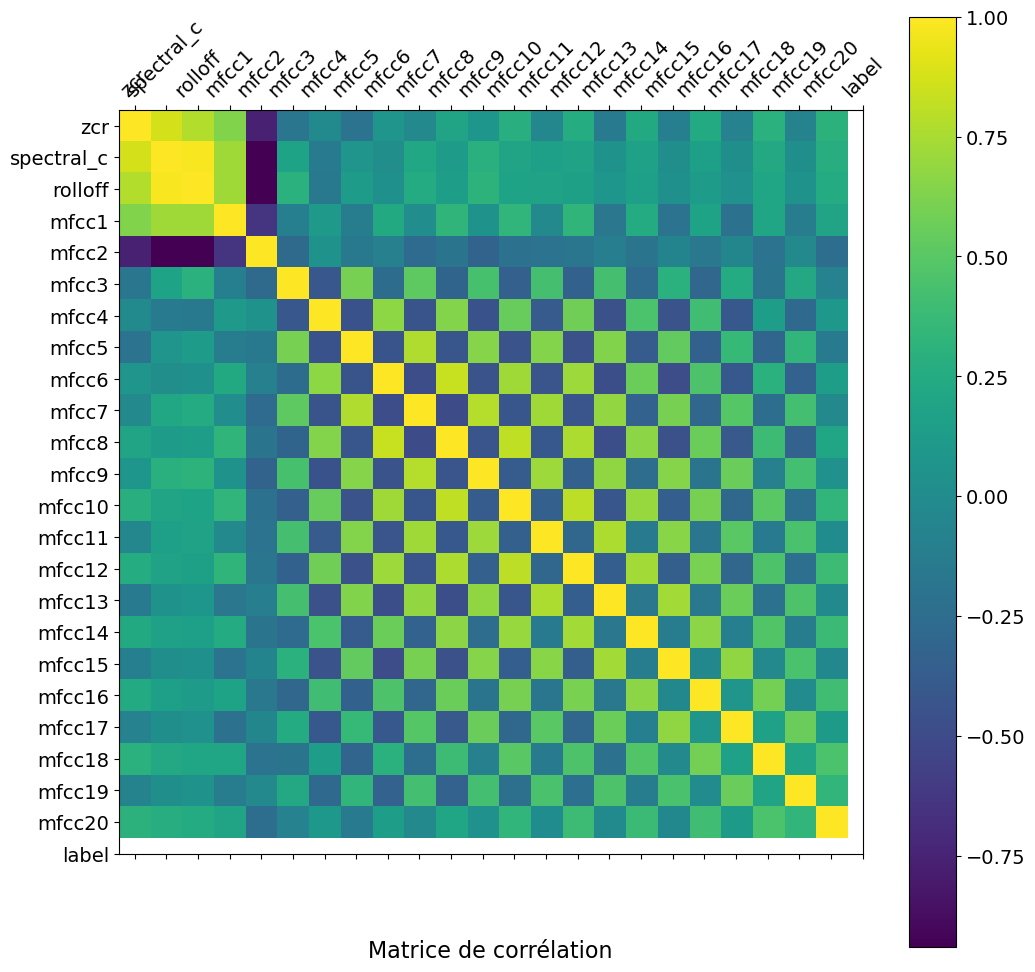

In [15]:
f = plt.figure(figsize=(12, 12))
#ax = plt.gca()
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
#ax.tick_params(axis="x", bottom=True)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

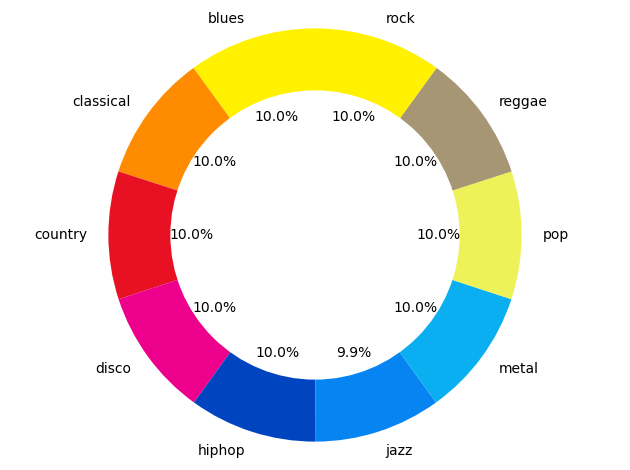

In [18]:
y = df['label']
values = np.unique(y,return_counts=True)[1]

labels = genres
sizes = values

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#0044bf','#0584f2','#0aaff1','#edf259','#a79674']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [22]:
import random

In [12]:
X = df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
           'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
           'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
           'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']]

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Création modèle

In [19]:
# features = pd.read_csv('music.xls')
features = df
# One-hot encode
labels = pd.get_dummies(features['label'])
# enleve les labels des features
features = features.drop('label', axis = 1)
# sauvegarde la liste des features
feature_list = list(features.columns)
# conversion en numpy array
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state = 0)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# scaling
sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

Training Features Shape: (749, 23)
Training Labels Shape: (749, 10)
Testing Features Shape: (250, 23)
Testing Labels Shape: (250, 10)


In [20]:
# Save the scaler to a file
joblib.dump(sc, "standard_scaler.pkl")

['standard_scaler.pkl']

In [21]:
def create_model(optimizer='adam'):
	# creation du modèle
	model = Sequential()
	model.add(Dense(23, input_dim=23, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) #, epochs=100, batch_size=10

# definition de la grille des paramètres
optimizer = ['SGD', 'RMSprop', 'Adam'] #['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=3)

t=np.asarray(train_labels)
rounded_labels=np.argmax(t, axis=1)
grid_result = grid.fit(train_features, rounded_labels, verbose=0)

pd_res = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

C:\Users\pasca\AppData\Local\Temp\ipykernel_84444\1219292578.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0) #, epochs=100, batch_size=10


,optimizer,Accuracy
1,RMSprop,0.576766
2,Adam,0.564707
0,SGD,0.542008


In [22]:
# nombre d'epochs
epochs = [100, 200]
# nombre de batch_size
batch_size = [10, 20]
# nombre de neurons
neurons = [92, 115, 161, 207, 230]
# fonction d'activation
activation = ['softsign', 'relu', 'tanh']

# Create the random grid
random_grid = {"epochs" : epochs,
    "batch_size" : batch_size,
    "neurons" : neurons,
    "activation" : activation
}
pprint(random_grid)

{'activation': ['softsign', 'relu', 'tanh'],
 'batch_size': [10, 20],
 'epochs': [100, 200],
 'neurons': [92, 115, 161, 207, 230]}


In [23]:
def create_model(neurons=23, activation='relu', learn_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=23, activation=activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = RMSprop(learning_rate=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

model = KerasClassifier(build_fn=create_model)

grid = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

t=np.asarray(train_labels)
rounded_labels=np.argmax(t, axis=1)
grid_result = grid.fit(train_features, rounded_labels, verbose=0)

pd_res = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(10)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\pasca\AppData\Local\Temp\ipykernel_84444\4058841748.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pasca\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pasca\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\pasca\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\pasca\AppData\Local\Temp\ipykernel_84444\4058841748.py", line 5, in create_model
NameError: name 'RMSprop' is not defined


In [ ]:
param_grid = {
    "epochs" : [100, 200],
    "batch_size" : [10, 20],
    "neurons" : [92, 115, 161, 207],
    "learn_rate" : [0.001],
    "activation" : ['softsign', 'relu'] #['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
}
pprint(param_grid)

In [ ]:
def create_model(neurons=23, activation='relu', learn_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=23, activation=activation))
    model.add(Dense(10, activation='softmax'))
    optimizer = RMSprop(learning_rate=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

model = KerasClassifier(build_fn=create_model)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=3)

t=np.asarray(train_labels)
rounded_labels=np.argmax(t, axis=1)
grid_result = grid.fit(train_features, rounded_labels, verbose=0)

pd_res = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

In [ ]:
# création du modèle
model = Sequential()
model.add(Dense(161, input_dim=23, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

# fit le modèle
model.fit(train_features, train_labels, epochs=200, batch_size=20, verbose=0)

# prédiction
predictions = model.predict(test_features)

# evaluation du modèle
_, accuracy = model.evaluate(test_features, test_labels, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

In [3]:
model = tf.keras.models.load_model('mymodelv1.keras')

In [10]:
model.evaluate(train_features, test_features)

ValueError: Data cardinality is ambiguous:
  x sizes: 749
  y sizes: 250
Make sure all arrays contain the same number of samples.

In [ ]:
loss = evaluation[0]
accuracy = evaluation[1]